In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

/home/levi/virtualenvs/iaml_env/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
user_dt = pd.read_csv('Data/user_data.csv', sep=',', header=0)
user_dt.head()

,event_time,user_id,event,channel,user_lat,user_long,origin,ad_id,images_count,ad_impressions,ad_views,ad_messages
0,2017-05-19 10:47:22,541,view,ios,-34.600439,-58.514031,browse_search,2426321,6.0,0.0,4.0,0.0
1,2017-06-10 10:18:12,501,view,android,-34.818047,-58.356583,browse_search,2746814,5.0,152.0,85.0,1.0
2,2017-06-11 00:44:57,559,view,android,-34.688454,-58.333435,browse,1123948,4.0,899.0,22.0,1.0
3,2017-05-22 02:36:06,637,first_message,android,-34.548401,-58.485168,search,2273498,NaN,0.0,21.0,2.0
4,2017-06-08 15:45:35,509,view,android,-34.582088,-58.405041,home,2722493,3.0,1529.0,132.0,3.0


In [3]:
ads_dt = pd.read_csv('Data/ads_data.csv', sep=',', header=0)
ads_dt.head()

,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,enabled
0,1344,800,1157,2015-11-29 13:05:26,Blackberry curve,"Funcionando, es para personal el único problem...",300.0,NaN,NaN,android,0
1,3916,815,59,2015-12-16 09:09:25,Remera marca premium alemana,Casi nuevo y sin uso. Lo compre online y me qu...,150.0,NaN,NaN,android,1
2,11738,806,12298,2016-01-19 18:38:24,Juego de sillones estilo campo,Divino juego de sillones de diseño campo,1500.0,NaN,NaN,android,1
3,14939,815,1349,2016-01-30 23:47:30,Zapatillas,Zapatillas nro 39 dos usos,250.0,NaN,NaN,android,0
4,16820,815,16365,2016-02-05 10:22:29,Vestido de seda negro,Vestido importado de usa. Muy fino y elegante ...,500.0,NaN,NaN,android,0


In [4]:
user_ad_interests_dt = pd.read_csv('Data/user_messages.csv', sep=',', header=0)
user_ad_interests_dt.head()
# remember this is the ads a user went to (in a 7 day period) after the 30 days prior of the user_data

,user_id,category_id,ads
0,1,859,[1806476]
1,3,800,"[2131700, 2734107, 2877209, 2877209]"
2,4,815,[2883211]
3,7,815,"[2429412, 2886810, 2886804]"
4,7,362,[2909301]


In [5]:
ads_dt['category_id'].unique()

array([800, 815, 806, 859, 811, 853, 881, 888, 887, 362])

In [6]:
print("num unique ads visited: {}".format(len(user_dt['ad_id'].unique())))
print("num total ads visited: {}".format(len(user_dt['ad_id'])))

num unique ads visited: 535651
num total ads visited: 2143889


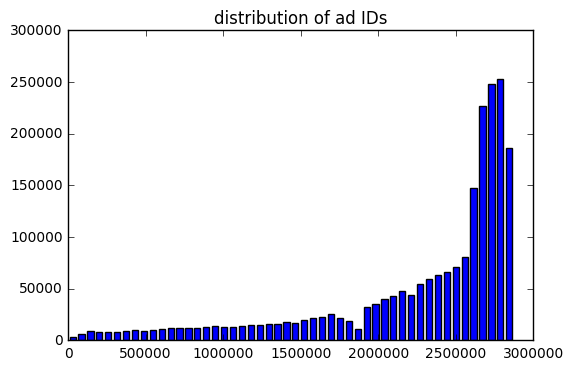

In [8]:
hist, bins = np.histogram(user_dt['ad_id'], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('distribution of ad IDs')
plt.show()

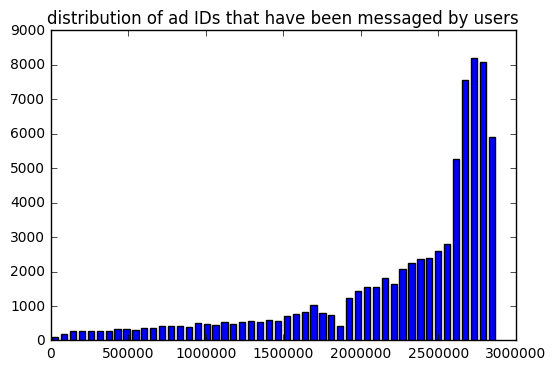

In [126]:
hist, bins = np.histogram(user_dt['ad_id'].values[np.where(user_dt['event'] == 'first_message')], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('distribution of ad IDs that have been messaged by users')
plt.show()

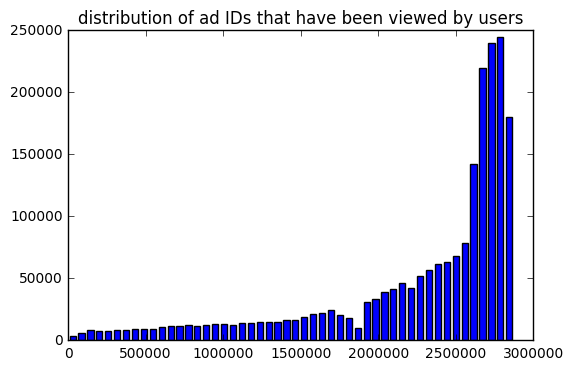

In [127]:
hist, bins = np.histogram(user_dt['ad_id'].values[np.where(user_dt['event'] == 'view')], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('distribution of ad IDs that have been viewed by users')
plt.show()

In [128]:
trim = np.where(bins > 2500000)
print("trimmed bins: {}".format(bins[bins > 2500000]))
trim = trim - np.ones(np.shape(trim))
trimAds = hist[trim.astype(int)]
totalNumAds = np.sum(trimAds)
print("total num ads above 2500000 events: {}".format(totalNumAds))

trimmed bins: [ 2529180.04  2586661.2   2644142.36  2701623.52  2759104.68  2816585.84
  2874067.  ]
total num ads above 2500000 events: 1173365


In [21]:
hist

array([  3461,   6101,   8759,   8103,   7709,   8612,   8941,   9922,
         9195,   9632,  10928,  11664,  11980,  12509,  12312,  12844,
        13934,  13369,  12965,  14294,  14914,  15014,  15642,  15793,
        17396,  16912,  19463,  21872,  22736,  25758,  21646,  18554,
        10627,  32403,  35259,  40586,  42717,  48107,  44187,  54184,
        59434,  63609,  66051,  71072,  81128, 147742, 226888, 248066,
       253071, 185824])

In [22]:
bins

array([  9.00000000e+00,   5.74901600e+04,   1.14971320e+05,
         1.72452480e+05,   2.29933640e+05,   2.87414800e+05,
         3.44895960e+05,   4.02377120e+05,   4.59858280e+05,
         5.17339440e+05,   5.74820600e+05,   6.32301760e+05,
         6.89782920e+05,   7.47264080e+05,   8.04745240e+05,
         8.62226400e+05,   9.19707560e+05,   9.77188720e+05,
         1.03466988e+06,   1.09215104e+06,   1.14963220e+06,
         1.20711336e+06,   1.26459452e+06,   1.32207568e+06,
         1.37955684e+06,   1.43703800e+06,   1.49451916e+06,
         1.55200032e+06,   1.60948148e+06,   1.66696264e+06,
         1.72444380e+06,   1.78192496e+06,   1.83940612e+06,
         1.89688728e+06,   1.95436844e+06,   2.01184960e+06,
         2.06933076e+06,   2.12681192e+06,   2.18429308e+06,
         2.24177424e+06,   2.29925540e+06,   2.35673656e+06,
         2.41421772e+06,   2.47169888e+06,   2.52918004e+06,
         2.58666120e+06,   2.64414236e+06,   2.70162352e+06,
         2.75910468e+06,

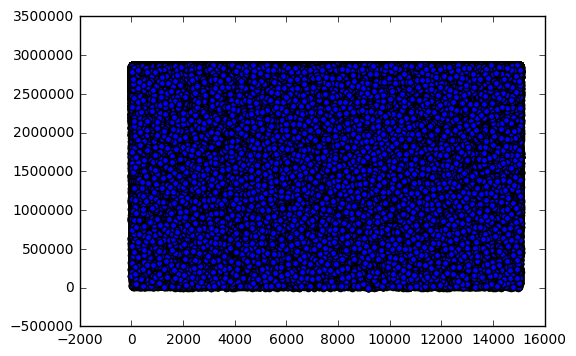

In [45]:
# comparing user_id vs. ad_id
user_ids = user_dt['user_id']
ad_ids = user_dt['ad_id']
plt.scatter(user_ids, ad_ids)
plt.show()

num of category 800 : 72561
num of category 815 : 267871
num of category 806 : 79110
num of category 859 : 13754
num of category 811 : 11408
num of category 853 : 70571
num of category 881 : 19640
num of category 888 : 64636
num of category 887 : 19813
num of category 362 : 25804


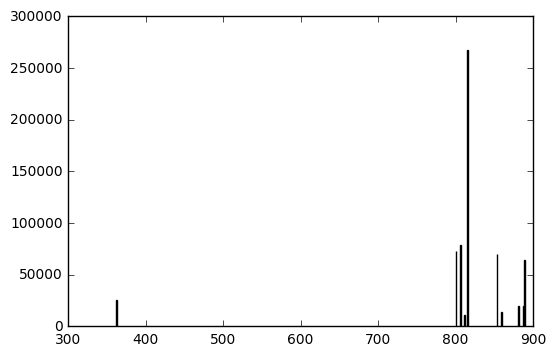

In [81]:
# number of ads per category
categories = ads_dt['category_id'].unique()
cat_values = np.zeros(len(categories))
for c in categories:
    ads_of_category = ads_dt['category_id'][((np.array(np.where(ads_dt['category_id'] == c))[0]))]
    print("num of category {} : {}".format(c, len(ads_of_category)))
    cat_values[np.where(categories == c)[0]] = len(ads_of_category)
    
plt.bar(categories, cat_values)
plt.show()

In [8]:
# remove all nan data
user_dt_views_clean = user_dt[user_dt['ad_views'].isnull() == False]

In [9]:
# explore what score we get if we just recommend the top 10 ads from each category:
# user_dt_views_clean.sort_values('ad_views', ascending = True)

# find the max viewed ad in each category
categories = ads_dt['category_id'].unique()
user_dt_with_ads_dt = ads_dt.merge(user_dt_views_clean, on='ad_id')
user_dt_with_ads_dt_sort = user_dt_with_ads_dt.sort_values('ad_views', ascending = False)
# user_dt_with_ads_dt_sort
# for c in categories:
#     idx_sorted_views_cat = np.where(user_dt_views_clean['ad_id'] == ads_dt['ad_id'] and ads_dt['category_id'] == c)

In [10]:
# find best advert in each category
best_ads_per_cat = []
user_dt_remove_dups = user_dt_with_ads_dt_sort[user_dt_with_ads_dt_sort.duplicated(subset='ad_id', keep='first') == False]
for c in categories:
#     ads_events_cat = user_dt_with_ads_dt.values[np.where(user_dt_with_ads_dt_sort['category_id'] == c)]
    ads_events_cat = user_dt_remove_dups.loc[user_dt_remove_dups['category_id'] == c]
    best_ads_per_cat.append((ads_events_cat.iloc[0:10]['ad_id'].values))
    
# best_ads_df = pd.DataFrame(data=best_ads_per_cat, index=categories, columns="ads")
print(best_ads_per_cat)
#     print(ads_events_cat)
#     print('Best ad for {}: {}'.format(c, ads_events_cat.iloc[0]))
    

[array([2814436, 2806603, 2816630, 2816336, 2649805, 2739908, 2031170,
       2802819, 2737601, 2817938]), array([2234932, 2434247, 2812937, 2719785, 2812849, 2796911, 2748424,
       2342155, 2668482, 2797067]), array([2804693, 2809690,   26400, 2825119, 2788868, 2785533, 2764905,
       2516918, 2822691, 2336966]), array([2449447, 2311444, 2388854, 1998464, 2274484, 2567368, 1720550,
       2455898, 2505738, 2426549]), array([2626729, 2764838, 1928465, 2753896, 2670023, 2727592, 2727018,
       2597250, 2746309, 2693669]), array([2564683, 2839832, 2082120, 2632665, 2853382, 2613818, 1190194,
       2832788, 2640469, 2704833]), array([2794985, 2816864, 2817712, 2840833, 2742243, 2444070, 2662331,
       2242072, 2846976, 2727695]), array([2254453, 2827386, 2740665, 2808111, 2578937, 2808064, 2826518,
       2808047, 2827584, 2487396]), array([2802433, 2852082, 2677927, 2692438, 2810869, 2634993, 2031454,
       2714941, 2642725, 2746846]), array([2757104, 2836886, 2853312, 2560201, 28

In [11]:
# compile test-set CSV file using the most popular ads data
data_test = pd.read_csv('Data/user_messages_test.csv', sep=',', header=0)
data_test.head()

# iterate through each user and create a DF of ads
user_test_ads = pd.DataFrame(np.random.randn(0), columns=['ads'])
for u in data_test['category_id']:
#     print(u)
    idx = np.where(categories == u)[0][0]
    ads_str = '[' + ', '.join(['%d' % n for n in best_ads_per_cat[idx]]) + ']'
#     ads_str = '[' + str(np.array(best_ads_per_cat[idx][0:1])) + ']'
#     print(idx)
    user_test_ads.loc[len(user_test_ads)] = ads_str
user_test_ads.head()

,ads
0,"[2814436, 2806603, 2816630, 2816336, 2649805, ..."
1,"[2234932, 2434247, 2812937, 2719785, 2812849, ..."
2,"[2626729, 2764838, 1928465, 2753896, 2670023, ..."
3,"[2814436, 2806603, 2816630, 2816336, 2649805, ..."
4,"[2234932, 2434247, 2812937, 2719785, 2812849, ..."


In [12]:
final_data_test = pd.concat([data_test, user_test_ads], axis=1)
final_data_test.head()

# save the final test dataframe
final_data_test.to_csv('final_user_messages_test.csv', sep=',')

## Analysing Ads with most messages ##

In [13]:
# using the ads with the most messages that are sorted and duplicates removed, find out how much of the messages
#  are represented by 20% of the population:

# remove all nan data
user_dt_messages_clean = user_dt[user_dt['ad_messages'].isnull() == False]

# merge the user data and the ad data
user_dt_msg_with_ads_data = ads_dt.merge(user_dt_messages_clean, on='ad_id')
user_dt_msg_with_ads_data_sort = user_dt_msg_with_ads_data.sort_values('ad_messages', ascending = False)
user_dt_msg_with_ads_data_sort.head()

# remove duplicates
user_dt_msg_with_ads_data_sort_no_dups = user_dt_msg_with_ads_data_sort[user_dt_msg_with_ads_data_sort.duplicated(subset='ad_id', keep='first') == False]
user_dt_msg_with_ads_data_sort_no_dups.head()



,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,...,user_id,event,channel,user_lat,user_long,origin,images_count,ad_impressions,ad_views,ad_messages
1918128,2804693,806,434981,2017-06-07 19:54:42,planta de limon,planta de limón,149.0,NaN,NaN,apple,...,1966,view,android,-34.543266,-58.692127,browse_search,1.0,693295.0,7165.0,189.0
1337225,2814436,800,635875,2017-06-08 22:30:32,iPhone 6 en excelente estado !,iPhone 6 en excelente estado !! muy poco uso.c...,8000.0,NaN,NaN,apple,...,4171,view,android,-34.581360,-58.420368,search,6.0,205481.0,3696.0,118.0
1513127,2726025,815,490708,2017-05-28 22:41:53,Buzo abrigado abercrombie,"Muy abrigado, Azul, peludito adentro, letras p...",260.0,NaN,NaN,apple,...,5751,view,android,-34.663368,-58.508793,notification_center,2.0,79.0,730.0,99.0
417601,2347424,815,540480,2017-04-13 21:02:43,Campera cuero negra. Sin uso,NaN,500.0,NaN,NaN,android,...,10204,view,android,-34.645706,-58.570988,search,3.0,257.0,1122.0,99.0
1307236,2598159,362,335997,2017-05-14 10:47:19,Fiat 147 modelo 87,Papeles al dia,12000.0,NaN,NaN,android,...,4622,view,android,-34.726551,-58.322262,browse_search,4.0,645.0,527.0,92.0


 ** here we are jsut testing to see how we perform by selecting the top 10 ads with the most messages from each category**

In [14]:
# get the best 10 ads per category
best_ads_per_cat = []
for c in categories:
    ads_events_cat = user_dt_msg_with_ads_data_sort_no_dups.loc[user_dt_msg_with_ads_data_sort_no_dups['category_id'] == c]
    best_ads_per_cat.append((ads_events_cat.iloc[0:10]['ad_id'].values))
    
# compile test-set CSV file using the most popular ads data
data_test = pd.read_csv('Data/user_messages_test.csv', sep=',', header=0)
data_test.head()

# iterate through each user and create a DF of ads
user_test_ads = pd.DataFrame(np.random.randn(0), columns=['ads'])
for u in data_test['category_id']:
    idx = np.where(categories == u)[0][0]
    ads_str = '[' + ', '.join(['%d' % n for n in best_ads_per_cat[idx]]) + ']'
    user_test_ads.loc[len(user_test_ads)] = ads_str

print(user_test_ads.head())

final_data_test = pd.concat([data_test, user_test_ads], axis=1)
print(final_data_test.head())

# save the final test dataframe
final_data_test.to_csv('final_user_messages_test.csv', sep=',')

                                                 ads
0  [2814436, 2798725, 2767097, 2802621, 2587040, ...
1  [2726025, 2347424, 2366751, 2642613, 2342155, ...
2  [2727592, 2764838, 2642858, 2626729, 2597250, ...
3  [2814436, 2798725, 2767097, 2802621, 2587040, ...
4  [2726025, 2347424, 2366751, 2642613, 2342155, ...
   user_id  category_id                                                ads
0        2          800  [2814436, 2798725, 2767097, 2802621, 2587040, ...
1        6          815  [2726025, 2347424, 2366751, 2642613, 2342155, ...
2       14          811  [2727592, 2764838, 2642858, 2626729, 2597250, ...
3       14          800  [2814436, 2798725, 2767097, 2802621, 2587040, ...
4       17          815  [2726025, 2347424, 2366751, 2642613, 2342155, ...


**Now we are going to analyse if our data follows the Pareto distribution: that is if 20% of the population represents 80% of the total messages of the entire population** (OMG IT DOES FOLLOW THE PARETO DISTRIBUTION!!!!!!)

For now, we will use a small percentage of the top ads in order for out model to be small and easily maneagable

In [15]:
twenty_percent_indx = int(len(user_dt_msg_with_ads_data_sort_no_dups) * 0.17)

user_dt_ad_dt_twenty_percent = user_dt_msg_with_ads_data_sort_no_dups[0:twenty_percent_indx]
num_messages_20p = sum(user_dt_ad_dt_twenty_percent['ad_messages'].values)
num_messages_100p = sum(user_dt_msg_with_ads_data_sort_no_dups['ad_messages'].values)
print("number of messages of top 20% of ads: {}".format(num_messages_20p))
print("number of messages of top 100% of ads: {}".format(num_messages_100p))
percent_rep_20p = 100.0 * num_messages_20p / num_messages_100p
print("{}% of ad messages represented by top 20% of the ads ({} ads)".format(percent_rep_20p, twenty_percent_indx))


number of messages of top 20% of ads: 302069.0
number of messages of top 100% of ads: 381938.0
79.0884908022% of ad messages represented by top 20% of the ads (89407 ads)


**What is the distribution of categories in the top 20% of the data?** Result: Our top 20% hold the apriori distribution fo the categories well enough that we do not have to hand-select to maintain the distribution.

In [16]:
for c in categories:
    num_cat_20p = len(user_dt_ad_dt_twenty_percent.values[np.where(user_dt_ad_dt_twenty_percent['category_id' ] == c)])
    num_cat_100p = len(user_dt_msg_with_ads_data_sort_no_dups.values[np.where(user_dt_msg_with_ads_data_sort_no_dups['category_id' ] == c)])
    print("num ads in category {}: {}".format(c, num_cat_20p))
    print("\ta priori 20%: {}".format(float(num_cat_20p) / len(user_dt_ad_dt_twenty_percent)))
    print("\ta priori 100%: {}".format(float(num_cat_100p) / len(user_dt_msg_with_ads_data_sort_no_dups)))

num ads in category 800: 16198
	a priori 20%: 0.181171496639
	a priori 100%: 0.113398513854
num ads in category 815: 30640
	a priori 20%: 0.342702472961
	a priori 100%: 0.410456643926
num ads in category 806: 11802
	a priori 20%: 0.132003087007
	a priori 100%: 0.124394399191
num ads in category 859: 1172
	a priori 20%: 0.0131085932869
	a priori 100%: 0.0206493713921
num ads in category 811: 2645
	a priori 20%: 0.0295838133479
	a priori 100%: 0.0176318251306
num ads in category 853: 7311
	a priori 20%: 0.0817721207512
	a priori 100%: 0.109158357481
num ads in category 881: 2524
	a priori 20%: 0.0282304517543
	a priori 100%: 0.0304112381257
num ads in category 888: 9348
	a priori 20%: 0.104555571711
	a priori 100%: 0.101742837368
num ads in category 887: 2292
	a priori 20%: 0.0256355766327
	a priori 100%: 0.0304987032347
num ads in category 362: 5475
	a priori 20%: 0.0612368159093
	a priori 100%: 0.0416581102973


## Self-Organising Map (Kohonen Map) ##
** Using a SOM to create a recommendation system. The input vector is an 1xN vector of features where each feature f_i is an ad (the # of ads used is reduced to a small percentage (approx. 20%) of the top ads). f_i is either {0, 1} where 0 means the user did not message this ad and 1 means the user did message this ad. We feed this data into the SOM which has an internal structure of MxM nodes. After the SOM has been trained, a new user's recommendations can be determined by feeding its history of messaged ads into the SOM, finding the strongest neuron and then either: selecting from the ads that other users in that neuron also chose in the post-7-day period, OR choosing ads the user might message by looking at the weights of the neuron (i.e. these weights should correspond with ads that user WOULD choose)

In [17]:
from math import exp
from math import sqrt

# a class for kohonen map
class KohonenMap:
    
    def __init__(self, size_feature_vec, dim_neuron):
        self.size_feature_vec = size_feature_vec
        self.dim_neuron = dim_neuron
        # neuron weights stored in an NxW matrix
        #  where: N = num neurons, W = feature vec size
        # --> weights randomly initialised
#         self.weights = ((np.random.randn(self.dim_neuron * self.dim_neuron, self.size_feature_vec)))
        # random binary initialisation
        self.weights = ((np.random.randn(self.dim_neuron * self.dim_neuron, self.size_feature_vec) > 0.9).astype(int)).astype(float)
        print('starting weights: \n{}'.format(self.weights))
        
        # print x, y position of each neuron
#         pos = []
#         for i in range(0, self.dim_neuron * self.dim_neuron):
#             pos.append(self.get_neuron_position(i))
#         print("neuron pos: {}".format(pos))
        
        # assign hyperparams
        self.var_0 = 15 #0.00001
        self.learning_rate_0 = 1.0 #1.0
        self.update_hyper_params(0)
        
        # keep track of average updates of values to see
        #  that the map is changing
        self.avg_activation_val = 0.0
        self.avg_dw_mean_update = np.zeros(self.size_feature_vec)
        self.avg_dw_max_update = np.zeros(self.size_feature_vec)
        
        self.error_over_time = []
        
    # given the index of a neuron, get its "position" in 2d space
    def get_neuron_position(self, neuron_idx):
        y_pos = int(float(neuron_idx) / float(self.dim_neuron))
        x_pos = neuron_idx % self.dim_neuron
        return (x_pos, y_pos)
    
    def get_neuron_index(self, x_pos, y_pos):
        return y_pos * self.dim_neuron + x_pos
    
    # return the index of the neuron with the heighest activation
    #  (i.e. weights which are closest to the weights of the input)
    def get_best_neuron(self, input_feature_vec):
        if np.shape(input_feature_vec) != (1, self.size_feature_vec):
            raise Exception("input feature vector {} is but should be {}".format(np.shape(input_feature_vec), (1, self.size_feature_vec)))
        
        diff_sqr_sum = np.sum(np.power(self.weights - input_feature_vec[0, :], 2), axis=1)
        #print("min dist: {}".format(np.min(diff_sqr_sum)))
        return np.argmin(diff_sqr_sum)
    
    def activation_metric(self, n_i, n_j):
        (x_i, y_i) = self.get_neuron_position(n_i)
        (x_j, y_j) = self.get_neuron_position(n_j)
        dist_sqr = float(pow(x_i - x_j, 2) + pow(y_i - y_j, 2))
        return exp(-dist_sqr / self.var)
        #return exp(-dist_sqr / (2.0 * self.var * self.var))
    
    def adjust_neuron_weight(self, n_best, n_update, input_feature_vec):
        if np.shape(input_feature_vec) != (1, self.size_feature_vec):
            raise Exception("input feature vector {} is but should be {}".format(np.shape(input_feature_vec), (1, self.size_feature_vec)))
        
        #act_value = self.activation_metric(n_best, n_update) 
        #d_w = self.learning_rate * act_value * \
        #    (input_feature_vec[0, :] - self.weights[n_update, :])
        
        d_w = self.learning_rate * \
            (input_feature_vec[0, :] - self.weights[n_update, :])
            
        self.weights[n_update, :] += d_w
        
        # record global data
#         self.avg_activation_val += act_value
        self.avg_dw_mean_update += d_w
        
        if n_update == n_best:
            self.avg_dw_max_update = d_w
        
    def update_hyper_params(self, time_step):
        # for now, the hyper-params are linearly updated
        if time_step < 1000:
            self.learning_rate = max(self.learning_rate_0*(1.0 - float(time_step) / 2000.0), 0.1)
        else:
            self.learning_rate = 0.01
#         self.var = max(self.var_0 * pow(0.99, float(time_step)), 10.0)
        self.var = max(self.var_0*(1.0 - float(time_step) / 2000.0), 1)
        
        #TEMP
#         self.learning_rate = 1.0
#         self.var = 1.0
        
#         print("hyperparams: lr={}, var={}".format(self.learning_rate, self.var))
        
    def train_single_input(self, input_feature_vec, time_step):
        # get the best neuron
        n_best = self.get_best_neuron(input_feature_vec)
        
        # update all neurons
#         for n in range(0, self.dim_neuron * self.dim_neuron):
#             self.adjust_neuron_weight(n_best, n, input_feature_vec)
        
        #TEST: adjust my neuron and the 8 neurons around me
        n_x, n_y = self.get_neuron_position(n_best)
        for n in range(0, self.dim_neuron * self.dim_neuron):
            x_pos, y_pos = self.get_neuron_position(n)
            if sqrt(pow(n_x - x_pos, 2) + pow(n_y - y_pos, 2)) <= self.var:
                self.adjust_neuron_weight(n_best, n, input_feature_vec)
                
#         for x in range(0, self.var):
#             for y in range(0, 3):
#                 x_pos = n_x + x - 1
#                 y_pos = n_y + y - 1
#                 if x_pos >= 0 and x_pos < self.dim_neuron and y_pos >= 0 and y_pos < self.dim_neuron:
#                     idx = self.get_neuron_index(x_pos, y_pos)
#                     self.adjust_neuron_weight(n_best, idx, input_feature_vec)
        
        # return the best neuron used, for debugging
        return n_best
        
    def train_dataset(self, input_data):
        # check that the input data is the right dimensionality
        if np.shape(input_data)[1] != self.size_feature_vec:
            raise Exception("input dataset {} is not correct dimension".format(np.shape(input_data)))
        
        # reset the stored error values over time
        self.error_over_time = []
        
        num_train = np.shape(input_data)[0]
        print("training on {} vectors.".format(num_train))
        epochs = 2
        time_step = 0
        for e in range(0, epochs):
            print("\n\nNEW EPOCH: {}".format(e))
            # update the Kohonen Map for each training vector
            for t in range(0, num_train):
                self.avg_activation_val = 0.0
                self.avg_dw_mean_update = np.zeros(self.size_feature_vec)
                self.avg_dw_max_update = np.zeros(self.size_feature_vec)
                train_vec = np.asarray([input_data[t, :]])
                #print("next train vector: {}".format(train_vec))
                t_n_best = self.train_single_input(train_vec, time_step)
                    
                if t % 200 == 0:
                    print("time_step: {}".format(t))
                    
                    # print the global info for this timestep
                    self.avg_activation_val /= float(self.dim_neuron * self.dim_neuron)
                    self.avg_dw_mean_update /= float(self.dim_neuron * self.dim_neuron)
                    print("\tavg activation val: {}".format(self.avg_activation_val))
                    print("\tavg dw mean update: {}".format(self.avg_dw_mean_update))
                    print("\tavg dw max update: {}".format(self.avg_dw_max_update))
                    print("\tsum max update: {}".format(np.sum(abs(self.avg_dw_max_update))))
                    print("\tbest neuron used: {}".format(t_n_best))
                    
                    print("hyperparams: lr={}, var={}".format(self.learning_rate, self.var))
                    
                # print the quantization error ever 100 timesteps
                #  NOTE: this value should be decreasing
                if (t + 1) % 600 == 0:
                    avg_q_error = self.average_quantization_error(input_data)
                    self.error_over_time.append(avg_q_error)
                    print("avg. quantization error at t={}: {}".format(time_step, avg_q_error))
                    
                # update the hyper params at each timestep
                self.update_hyper_params(time_step)
                    
                time_step += 1
                    
                            
    # average distance of all input vectors to their best neuron. A measure of how
    #  well the map has fit the data
    def average_quantization_error(self, input_data, rand=True, count=700):
        # check that the input data is the right dimensionality
        if np.shape(input_data)[1] != self.size_feature_vec:
            raise Exception("input dataset {} is not correct dimension".format(np.shape(input_data)))
                      
        print("START: avg. quantixation error calc")
        num_train = np.shape(input_data)[0]
        avg_q_error = 0.0
        # test on 100 random inputs
        neuron_choices = []
        for t in range(0, count):
            if rand:
                idx = np.random.randint(0, num_train)
            else:
                idx = t
                
            train_vec = np.asarray([input_data[idx, :]])
            n_best = self.get_best_neuron(train_vec)
            neuron_choices.append(n_best)
            dist_to_best = sum(abs(train_vec[0, :] - self.weights[n_best, :]))
            avg_q_error += dist_to_best
            
        print('best neurons: {}'.format(neuron_choices))
                            
        return avg_q_error / float(num_train)
        
    

** DATASET: ** we now must compile the dataset which is |U|x|N| where |U| is the number of user_ids we are training on (that must have some minimum number of ads messaged in the top x% of ads - NOTE: could change to views later - NOTE2: views could be 1/10 of a message value) and |N| is the number of ads in the top x% of ads. A single user feature vector is a binary vector where each feature is 1 if the user sent a message to the ad_id associated with that feature, otherwise it is 0. 

In [18]:
# this is the data we have to use to create the feature-vector training format:
user_dt_ad_dt_twenty_percent.head()

,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,...,user_id,event,channel,user_lat,user_long,origin,images_count,ad_impressions,ad_views,ad_messages
1918128,2804693,806,434981,2017-06-07 19:54:42,planta de limon,planta de limón,149.0,NaN,NaN,apple,...,1966,view,android,-34.543266,-58.692127,browse_search,1.0,693295.0,7165.0,189.0
1337225,2814436,800,635875,2017-06-08 22:30:32,iPhone 6 en excelente estado !,iPhone 6 en excelente estado !! muy poco uso.c...,8000.0,NaN,NaN,apple,...,4171,view,android,-34.581360,-58.420368,search,6.0,205481.0,3696.0,118.0
1513127,2726025,815,490708,2017-05-28 22:41:53,Buzo abrigado abercrombie,"Muy abrigado, Azul, peludito adentro, letras p...",260.0,NaN,NaN,apple,...,5751,view,android,-34.663368,-58.508793,notification_center,2.0,79.0,730.0,99.0
417601,2347424,815,540480,2017-04-13 21:02:43,Campera cuero negra. Sin uso,NaN,500.0,NaN,NaN,android,...,10204,view,android,-34.645706,-58.570988,search,3.0,257.0,1122.0,99.0
1307236,2598159,362,335997,2017-05-14 10:47:19,Fiat 147 modelo 87,Papeles al dia,12000.0,NaN,NaN,android,...,4622,view,android,-34.726551,-58.322262,browse_search,4.0,645.0,527.0,92.0


In [19]:
# NOTE: the above data has removed duplicate events where ad_ids were the same. This is not good for what we want
#  because two events with the same ad_id could be from different users
top_ad_ids = user_dt_ad_dt_twenty_percent['ad_id'].values
print("top ad_ids in descending order: {}".format(top_ad_ids))
print("number of ads: {}".format(len(top_ad_ids)))

top ad_ids in descending order: [2804693 2814436 2726025 ..., 2665438 2546267 2665525]
number of ads: 89407


In [20]:
# get the user_ids used for the training set:
user_ids_train = user_ad_interests_dt['user_id'].values
print("user ids for training: {}".format(user_ids_train))
print("number of users: {}".format(len(user_ids_train)))

user ids for training: [    1     3     4 ..., 15056 15061 15066]
number of users: 10348


In [21]:
# get the user_ids used for the test set:
user_messages_test = pd.read_csv('Data/user_messages_test.csv', sep=',', header=0)
user_ids_test = user_messages_test['user_id'].values
print("user ids for training: {}".format(user_ids_test))
print("number of users: {}".format(len(user_ids_test)))

user ids for training: [    2     6    14 ..., 15059 15060 15064]
number of users: 10507


In [22]:
# we now iterate through each interaction event of the users and find all the ads they have messaged or with
user_data_fm = user_dt[user_dt['event'].apply((lambda event: event == 'first_message'))]
user_data_fm_ad = user_data_fm[user_data_fm['ad_id'].apply(lambda ad_id: ad_id in top_ad_ids)]

** Compiling train data:**  pair users with the ads the have clicked

In [23]:
user_ad_data_train = np.zeros(shape=(len(user_ids_train), len(top_ad_ids)))
user_ad_data_train_cum = np.zeros(shape=(len(user_ids_train), 1))

for u in range(0, len(user_ids_train)):
    # create the user feature vector by first extracting all ads of that user (this includes the post-7-day ads)
    user_ad_fm = user_data_fm_ad[user_data_fm_ad['user_id'].apply(lambda user_id: user_id == user_ids_train[u])]
    user_ads_clicked = user_ad_interests_dt[user_ad_interests_dt['user_id'] == user_ids_train[u]]
    # now get each ad id and ad it to the binary feature vector
    #user_vec = np.zeros(len(top_ad_ids))
    for a in user_ad_fm['ad_id']:
        user_ad_data_train[u, np.where(top_ad_ids == a)[0]] = 1
    for a in user_ads_clicked['ads']:
        ads_usr_click = a.split(',')
        ads_usr_click[0] = ads_usr_click[0][1:len(ads_usr_click[0])]
        ads_usr_click[len(ads_usr_click) - 1] = ads_usr_click[len(ads_usr_click) - 1][0:len(ads_usr_click[len(ads_usr_click) - 1]) - 1]
        for c in ads_usr_click:
            user_ad_data_train[u, np.where(top_ad_ids == int(c))[0]] = 1
            
    user_ad_data_train_cum[u] = np.sum(user_ad_data_train[u, :])
            
# print(user_ad_data_train)
# print(np.sum(user_ad_data_train, axis=1)[0:20])
# print(len(user_ad_data_train[:, 0]))

In [24]:
# clean data by removing all users that didn't click on any ads
# print(np.shape(np.array([user_ids_train]).T))
# print(np.shape(user_ad_data_train))
# merge = np.hstack((np.array([user_ids_train]).T, user_ad_data_train))
# print(np.shape(merge))
clean_data_train = pd.DataFrame(data=user_ad_data_train, columns=range(0, len(top_ad_ids)))
# print(np.shape(clean_data_train))
user_ad_data_train_cum_bool = (user_ad_data_train_cum > 0)
print(user_ad_data_train_cum_bool)
clean_data_ids = pd.DataFrame(data=user_ids_train, columns=['user_id'])
# clean_idx = clean_data_train[clean_data_train.apply(lambda row: np.sum(row) > 0, axis=1)]
#clean_data_train_sum = clean_data_train.sum(axis=1)
#print(clean_data_train_sum.h[ead())
clean_idx = clean_data_train[user_ad_data_train_cum_bool]

# clean_data_train = clean_data_train[clean_idx]
# clean_data_ids = clean_data_ids[clean_idx]

# clean_data_train.head()
# clean_data_ids.head()

# clean_data_train = pd.concat([clean_data_train, clean_data_ids], axis=0)
# clean_data_train.head()

[[False]
 [False]
 [ True]
 ..., 
 [ True]
 [ True]
 [ True]]


In [25]:
print(np.shape(clean_idx.values))
print(len(top_ad_ids))

(8662, 89407)
89407


In [27]:
user_mg_distr = np.sum(clean_idx, axis=1)
hist, bins = np.histogram(user_mg_distr, bins=100)
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(hist)
print(bins)

MemoryError: 

** Compiling test data:**  pair users with the ads the have clicked

In [33]:
user_ad_data_test = np.zeros(shape=(len(user_ids_test), len(top_ad_ids)))

for u in range(0, len(user_ids_test)):
    # create the user feature vector by first extracting all ads of that user (this includes the post-7-day ads)
    user_ad_fm = user_data_fm_ad[user_data_fm_ad['user_id'].apply(lambda user_id: user_id == user_ids_test[u])]
    user_ads_clicked = user_ad_interests_dt[user_ad_interests_dt['user_id'] == user_ids_test[u]]
    # now get each ad id and ad it to the binary feature vector
    #user_vec = np.zeros(len(top_ad_ids))
    for a in user_ad_fm['ad_id']:
        user_ad_data_test[u, np.where(top_ad_ids == a)[0]] = 1
    for a in user_ads_clicked['ads']:
        ads_usr_click = a.split(',')
        ads_usr_click[0] = ads_usr_click[0][1:len(ads_usr_click[0])]
        ads_usr_click[len(ads_usr_click) - 1] = ads_usr_click[len(ads_usr_click) - 1][0:len(ads_usr_click[len(ads_usr_click) - 1]) - 1]
        for c in ads_usr_click:
            user_ad_data_test[u, np.where(top_ad_ids == int(c))[0]] = 1

MemoryError: 

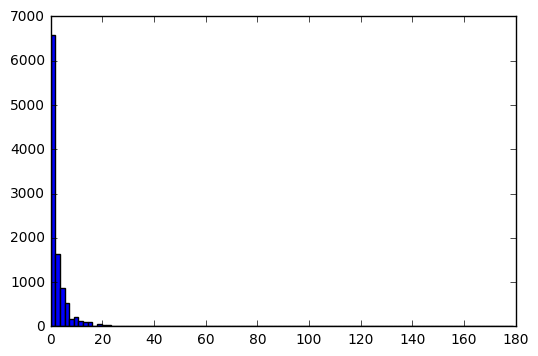

[6582 1637  875  530  160  209  128   98  100   14   46   25   25    8    3
   12   11    4    7    3    3   11    7    0    0    0    0    1    0    0
    0    2    0    1    0    4    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    1]
[   0.      1.79    3.58    5.37    7.16    8.95   10.74   12.53   14.32
   16.11   17.9    19.69   21.48   23.27   25.06   26.85   28.64   30.43
   32.22   34.01   35.8    37.59   39.38   41.17   42.96   44.75   46.54
   48.33   50.12   51.91   53.7    55.49   57.28   59.07   60.86   62.65
   64.44   66.23   68.02   69.81   71.6    73.39   75.18   76.97   78.76
   80.55   82.34   84.13   85.92   87.71   89.5    91.29   93.08   94.87
   96.66   98.45  100.24  102.03  103.82  105.61  107.

In [190]:
user_mg_distr_test = np.sum(user_ad_data_test, axis=1)
hist, bins = np.histogram(user_mg_distr_test, bins=100)
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(hist)
print(bins)

** We now train the Kohonan Map using the user data: **

In [28]:
neuron_dim = 5
k_map_2 = KohonenMap(len(top_ad_ids), neuron_dim)
k_map_2.train_dataset(clean_idx.values)

starting weights: 
[[ 1.0932665  -0.49316257 -0.33522813 ..., -0.24830175 -0.38729305
  -2.47540166]
 [ 1.88088123  1.22011845  0.07518001 ...,  1.06309922 -1.46615342
   0.7963445 ]
 [-1.81059187 -0.80433237  1.80835618 ..., -0.81864634 -1.07151752
  -0.80995392]
 ..., 
 [ 1.43184904  0.93982107 -0.06896956 ..., -0.74470843 -1.97547082
  -0.15510846]
 [-0.10728407 -0.87133134 -0.82803358 ...,  0.40610258 -0.12650487
  -0.05279247]
 [-1.17990949  0.23282319  1.15107378 ..., -0.04554359  1.31820922
   0.08590523]]
training on 8662 vectors.


NEW EPOCH: 0
time_step: 0
	avg activation val: 0.0
	avg dw mean update: [-0.17998143 -0.0556618   0.01381845 ..., -0.02254116  0.00878949
  0.1487504 ]
	avg dw max update: [ 0.80123715 -0.16084263 -0.64672516 ..., -1.41701858  0.10433806
 -0.55305269]
	sum max update: 70923.748152
	best neuron used: 3
hyperparams: lr=1.0, var=15.0
time_step: 200
	avg activation val: 0.0
	avg dw mean update: [ 0.  0.  0. ...,  0.  0.  0.]
	avg dw max update: [ 0.  0.

KeyboardInterrupt: 

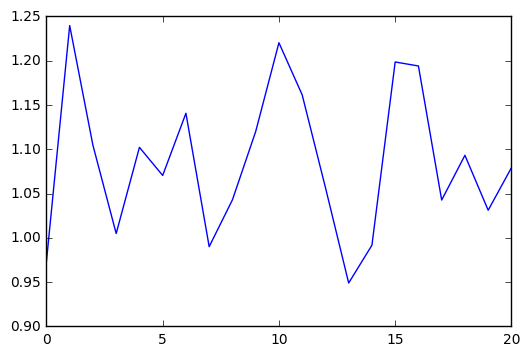

In [29]:
# graph the quant error over time of the map
error_vals = k_map_2.error_over_time
plt.plot(range(0, len(error_vals)), error_vals)
plt.show()

**NOTES:**: 
5 (1) epochs (5% data), 5x5 latice, 10 = v_0, 1 = lr_0, decrease mono to 1000, 0.1 = min_lr, 1.0 = min_v ===> 0.1 min. qer @ t = 6000

2 (?) epochs (5% data), 10x10 latice, 10 = v_0, 1 = lr_0, decrease mono to 1000, 0.1 = min_lr, 1.0 = min_v ===> 0.1 min. qer @ t = 6000

2 (?) epochs (20% data), 5x5 latice, 10 = v_0, 1 = lr_0, decrease mono to 1000, 0.1 = min_lr, 1.0 = min_v ===> 1.1 min. qer @ t = NO REAL IMPROVEMENT

In [31]:
# avg quantization error of entire dataset
k_base = KohonenMap(len(top_ad_ids), neuron_dim)
base_aq = k_base.average_quantization_error(clean_idx.values, rand=False, count=3500)

avg_error = k_map_2.average_quantization_error(clean_idx.values, rand=False, count=3500)
# avg_error = 0
# for i in range(0, 10):
#     clear_output()
#     avg_error += k_map.average_quantization_error(clean_idx.values)

print("avg. quant. error random: {}".format(base_aq))
print("avg. quant. error train: {}".format(avg_error / 100.0))

starting weights: 
[[ 2.05705722  0.56625404  1.7568975  ...,  0.14773438  1.15054697
  -0.85156475]
 [-0.80235895  1.01590535 -0.22496112 ...,  1.89909514 -0.25043556
   0.3335187 ]
 [ 0.37020456 -0.08609844  0.11765797 ..., -0.5228479   0.15090678
  -0.95699605]
 ..., 
 [ 0.12095395  0.25358958 -0.54357809 ...,  0.6693518  -1.87111955
   0.08355185]
 [ 1.03287594 -1.13357871 -0.24696651 ..., -2.17794938  0.22025854
  -0.39764427]
 [ 0.72350305 -2.2060565  -0.43368212 ..., -1.76297636 -0.23794573
   0.14884992]]
START: avg. quantixation error calc
best neurons: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

** Recommend ads for the test users: ** we now run the user test data through the map and find the best neurons. We compare the weights of the neurons to that of the test user's weights and any vector features > 0.5 (TODO: test this threshold) we add that ad feature to the ones we would recommend for that user.

In [32]:
# user_ad_data_test
for i in range(0, 1):
    idx = 29
    n_best = k_map_2.get_best_neuron(np.asarray([user_ad_data_test[idx, :]]))
    n_best_weights = k_map_2.weights[n_best, :]
    # get the difference between the two weights:
    print("user recommends: {}".format(np.sum(user_ad_data_test[idx, :])))
    n_to_user_diff = n_best_weights - user_ad_data_test[idx, :]
    n_to_user_diff_recommendations = (n_to_user_diff > 0).astype(int)
    print("diff: {}".format(np.sum(n_to_user_diff_recommendations)))
    print("best neuron: {}".format(n_best))
    print(n_to_user_diff_recommendations[0:10])

NameError: name 'user_ad_data_test' is not defined



## [PAGE BREAK] ##

In [107]:
#how many total messages were sent by all users
numMessagesTotal = np.nansum(user_dt['ad_messages'].values)
print("total messages sent: {}".format(numMessagesTotal))

total messages sent: 4067494.0


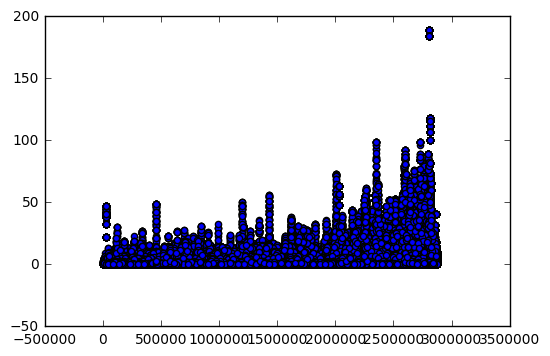

In [125]:
# # ad id vs messages sent
# ad_ids_unique = user_dt['ad_id'].unique()
# ad_ids_unique_count = np.zeros(np.shape(ad_ids_unique))
# # print(ad_ids_unique[0])
# # print(np.where(user_dt['ad_id'] == ad_ids_unique[0]))
# # print(user_dt['ad_messages'].values)
# # print(user_dt['ad_messages'].values[np.where(user_dt['ad_id'] == ad_ids_unique[0])])
# for i in range(0, len(ad_ids_unique)):
#     ad_ids_unique_count[i] = sum(user_dt['ad_messages'].values[np.where(user_dt['ad_id'] == ad_ids_unique[0])])
    
ad_ids = user_dt['ad_id']
user_messages = user_dt['ad_messages']
plt.scatter(ad_ids, user_messages)
plt.show()



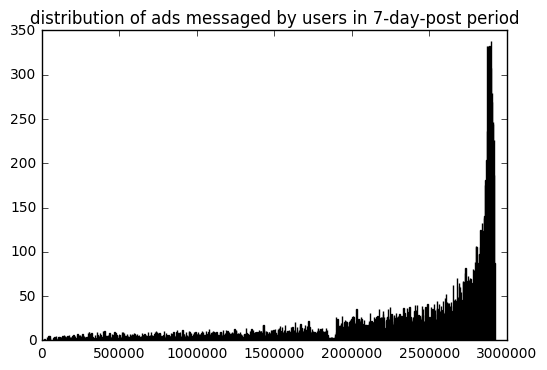

In [377]:
# distribution of ads chosen by user during the post-7-day period
# ads_ = np.zeros(1)
# for a in user_ad_interests_dt['ads'].values:
#     print(a)
#     print(ads_)
#     ads_ = np.hstack((ads_, a))
ads_ = sum(user_ad_interests_dt['ads'].apply(eval).tolist(), [])
hist, bins = np.histogram(ads_, bins=1000)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('distribution of ads messaged by users in 7-day-post period')
plt.show()